<a href="https://colab.research.google.com/github/CBravoR/AdvancedAnalyticsLabs/blob/master/notebooks/python/Lab_2_Capital_Requirements_and_Pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
# Basic packages
import numpy as np

# Data reading
import pandas as pd

# Plotting
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Reading the data

For this exercise we will read a dataset from credit scoring. I previously uploaded the data to Google, and it is available at https://docs.google.com/spreadsheets/d/1Am74y2ZVQ6dRFYVZUv_VoyP-OTS8BM4x0svifHQvtNc/export?gid=819627738&format=csv

The dataset (called **Bankloan**, from IBM) has a set of 1,000 loans with default information. It includes the following variables:

- Customer: ID, or unique label, of the borrower (NOT predictive).
- Age: Age of the borrower in years.
- Education: Maximum education level the borrower reached.
1: Complete primary. 2: Completed Secondary. 3: Incomplete Higher Ed. 4: Complete Higher Ed. 5: With postgraduate studies (complete MSc or PhD).
- Employ: Years at current job.
- Address: Years at current address.
- Income: Income in ‘000s USD.
- Leverage: Debt/Income Ratio.
- CredDebt: Credit card standing debt.
- OthDebt: Other debt in ‘000s USD.
- MonthlyLoad: Monthly percentage from salary used to repay debts.
- Default: 1 If default has occurred, 0 if not (Target variable).
- PD: The calibrated probability of default of the loan.
- LGD: The estimated LGD for the loan.
- Outstanding: EAD.

goal:whether the loan is going to default or not

In [1]:
!gdown https://drive.google.com/uc?id=1lyEd01JaoVbL1mbgn-wr3YvLmURAgQ8B

Downloading...
From: https://drive.google.com/uc?id=1lyEd01JaoVbL1mbgn-wr3YvLmURAgQ8B
To: /content/bankloan_scored_nodefault.csv
100% 58.3k/58.3k [00:00<00:00, 36.1MB/s]


In [2]:
!head /content/bankloan_scored_nodefault.csv

﻿Age,Employ,Address,Leverage,Creddebt,MonthlyLoad,PD,LGD,Outstanding
28,7,2,17.7,2.99,0.58,0.660,0.438,4440
64,34,17,14.7,5.05,0.27,0.029,0.051,10479
30,11,3,34.5,1.75,1.62,0.660,0.369,12081
25,2,2,22.4,0.76,0.97,0.660,0.357,1828
35,2,9,10.9,1.46,0.4,0.476,0.694,9750
26,2,4,11.9,0.95,0.43,0.370,0.245,4238
25,4,2,14.4,1.05,0.62,0.476,0.517,4285
65,29,14,5,3.36,0.08,0.000,0.636,10698
62,33,13,17.5,6.69,0.36,0.195,0.372,4952


In [4]:
bankloan_data = pd.read_csv('/content/bankloan_scored_nodefault.csv')

In [5]:
bankloan_data.head()

,Age,Employ,Address,Leverage,Creddebt,MonthlyLoad,PD,LGD,Outstanding
0,28,7,2,17.7,2.99,0.58,0.660,0.438,4440
1,64,34,17,14.7,5.05,0.27,0.029,0.051,10479
2,30,11,3,34.5,1.75,1.62,0.660,0.369,12081
3,25,2,2,22.4,0.76,0.97,0.660,0.357,1828
4,35,2,9,10.9,1.46,0.40,0.476,0.694,9750


In [6]:
bankloan_data.dtypes

,0
Age,int64
Employ,int64
Address,int64
Leverage,float64
Creddebt,float64
MonthlyLoad,float64
PD,float64
LGD,float64
Outstanding,int64


Summary statistics of the numerical variables

In [7]:
bankloan_data.describe()

,Age,Employ,Address,Leverage,Creddebt,MonthlyLoad,PD,LGD,Outstanding
count,1466.000000,1466.000000,1466.000000,1466.000000,1466.000000,1466.000000,1466.000000,1466.000000,1466.000000
mean,33.654843,6.450205,6.075034,9.862619,1.674829,0.369714,0.363561,0.504342,7236.872442
std,12.717335,8.213568,5.848704,6.586403,2.005911,0.295177,0.259614,0.225147,3264.620860
min,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.018000,1531.000000
25%,24.000000,0.000000,2.000000,4.800000,0.410000,0.152500,0.195000,0.337000,4414.500000
50%,30.500000,3.000000,4.000000,8.500000,0.945000,0.300000,0.370000,0.502000,7314.000000
75%,41.000000,9.000000,9.000000,13.400000,2.097500,0.500000,0.476000,0.682750,9998.750000
max,77.000000,51.000000,34.000000,40.700000,14.370000,2.150000,1.000000,0.977000,12899.000000


 plot the histograms of the variables

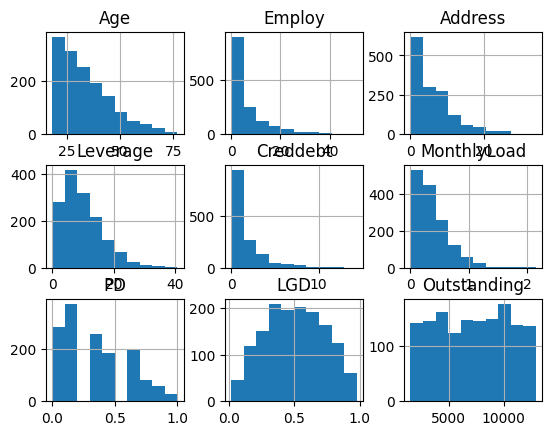

In [10]:
histograms = bankloan_data.hist()

In [11]:
bankloan_data.loc[bankloan_data.loc[:, 'Age'] < 37, :]

,Age,Employ,Address,Leverage,Creddebt,MonthlyLoad,PD,LGD,Outstanding
0,28,7,2,17.7,2.99,0.58,0.660,0.438,4440
2,30,11,3,34.5,1.75,1.62,0.660,0.369,12081
3,25,2,2,22.4,0.76,0.97,0.660,0.357,1828
4,35,2,9,10.9,1.46,0.40,0.476,0.694,9750
5,26,2,4,11.9,0.95,0.43,0.370,0.245,4238
...,...,...,...,...,...,...,...,...,...
1460,19,0,0,19.3,2.20,0.76,1.000,0.515,4695
1461,30,8,2,15.8,1.53,0.72,0.660,0.364,8803
1462,27,0,3,1.0,0.32,0.03,0.370,0.320,4437
1463,31,3,6,12.9,0.74,0.67,0.370,0.734,5360


In [12]:
bankloan_data.iloc[0:5, 1:2]

,Employ
0,7
1,34
2,11
3,2
4,2


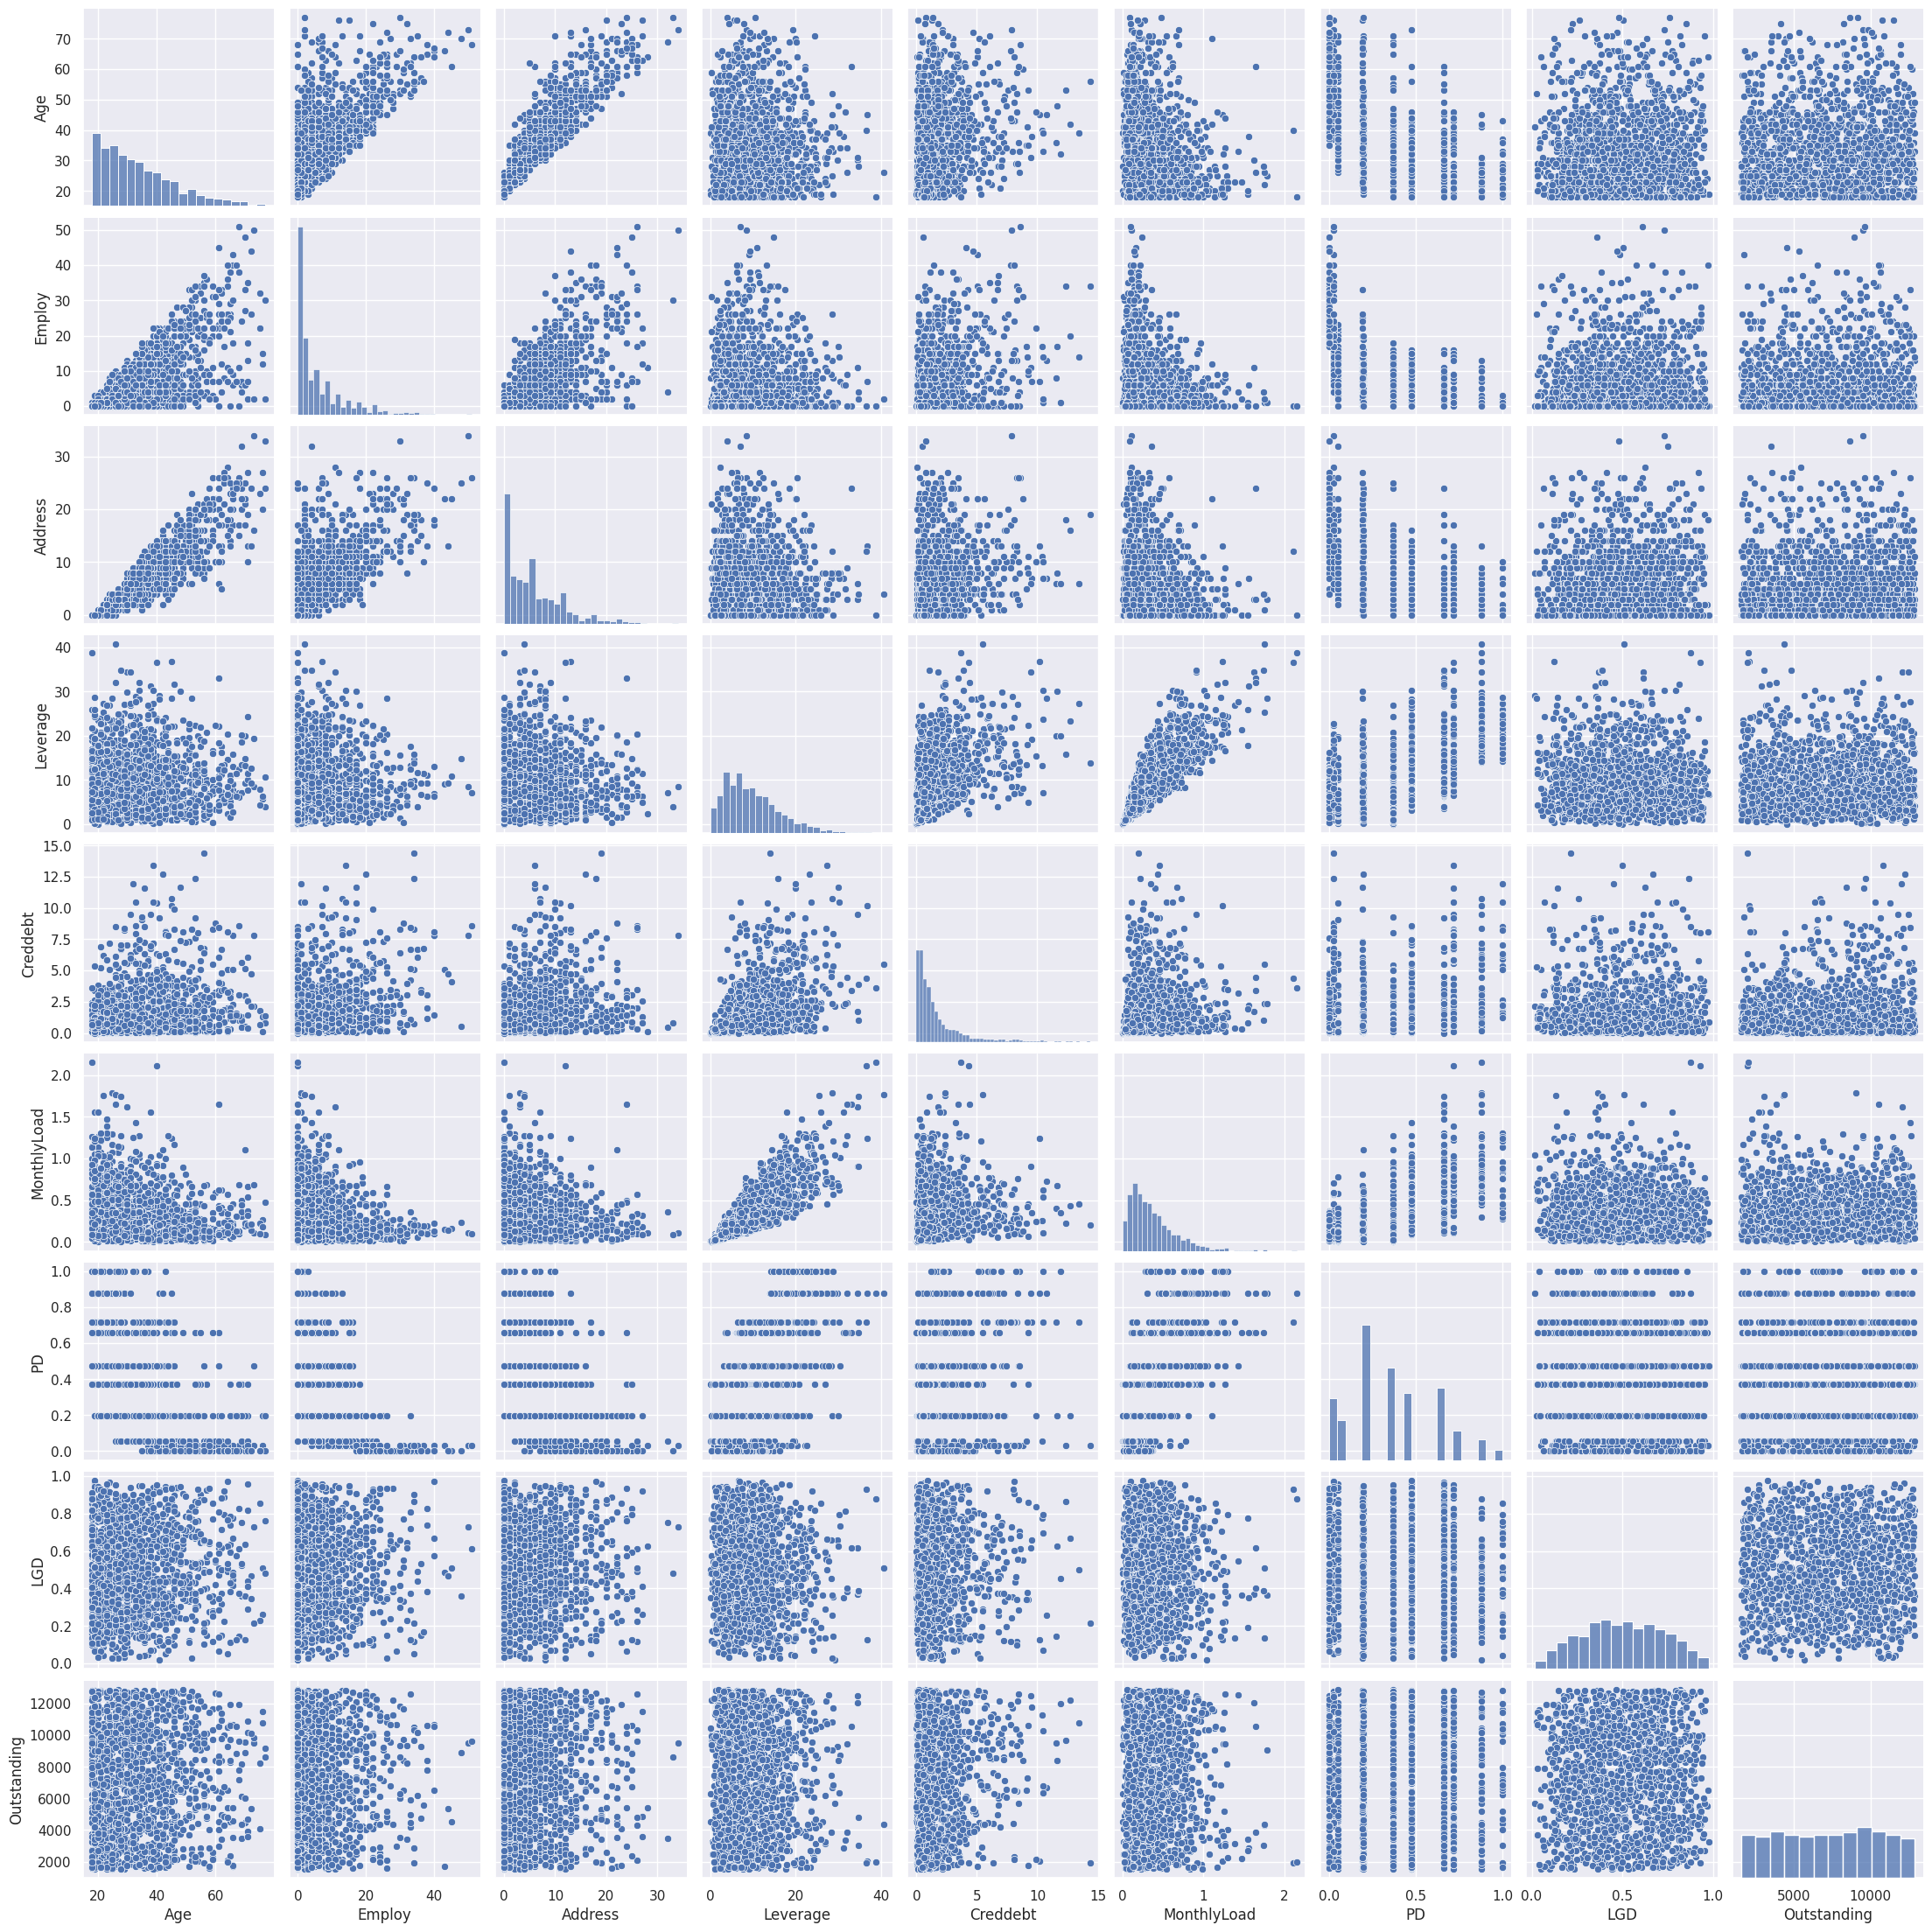

In [15]:
sns.set(color_codes=True)
sns.pairplot(bankloan_data)
plt.savefig('Hist.pdf')
plt.savefig('Hist.jpg')
plt.show()

## Basel III Capital Requirements

Recalling the last lecture, the equation for the capital requirement of any operation is:

$$
K = LGD \cdot \left\{ N\left( \sqrt{\frac{1}{1-R}} \cdot N^{-1}(PD) + \sqrt{\frac{R}{1-R}} \cdot N^{-1}(0.999) \right) - PD \right\} \left( \frac{1 + (M - 2.5)b}{1 - 1.5b}\right)
$$

The values of $b$ and $M$ will be variable for bonds, but for retail and mortgages the maturity is fixed at 1, and the b term dissapears. The correlations are given by the regulation:

- Mortgages: $R = 0.15$
- Revolving: $R = 0.04$
- Other retail: $R = 0.03 \left( \frac{1 - e^{-35PD}}{1 - e^{-35}} \right) + 0.16 \left( 1 - \frac{1 - e^{-35PD}}{1 - e^{-35}} \right)$
- Corporate and sovereign exposures $ R = 0.12 \left( \frac{1 - e^{-50PD}}{1 - e^{-50}} \right) + 0.24 \left( 1 - \frac{1 - e^{-50PD}}{1 - e^{-50}} \right)$



In [16]:
#Other retail
def capital_requirement_retail(PD, LGD):
  import numpy as np
  from scipy.stats import norm
  # Check if PD satisfies floor
  if PD < 0.0003:
    PD = 0.0003
  # First part of the equation, lower correlation
  R =  0.03 * ( (1 - np.exp(-35 * PD)) / (1 - np.exp(-35)) )
  # Second part of the equation, higher correlation
  R += 0.16 * (1 - ( (1 - np.exp(-35 * PD)) / (1 - np.exp(-35)) ) )
  # Now we can calculate the capital
  K = norm.cdf(np.sqrt( (1 - R) ** (-1) ) * norm.ppf(PD) +
               np.sqrt( R / (1 - R) ) * norm.ppf(0.999) ) - PD
  K *= LGD
  return(K)

In [17]:
capital_requirement_retail(0.5, 0.5)

np.float64(0.10329635898450196)

Or we can print it in a nicer format using a [f-string](https://statics.teams.cdn.office.net/evergreen-assets/safelinks/1/atp-safelinks.html).

In [18]:
print(f'PD = 0.5 & LGD = 0.5. K = {capital_requirement_retail(0.5, 0.5):.3f}')

PD = 0.5 & LGD = 0.5. K = 0.103


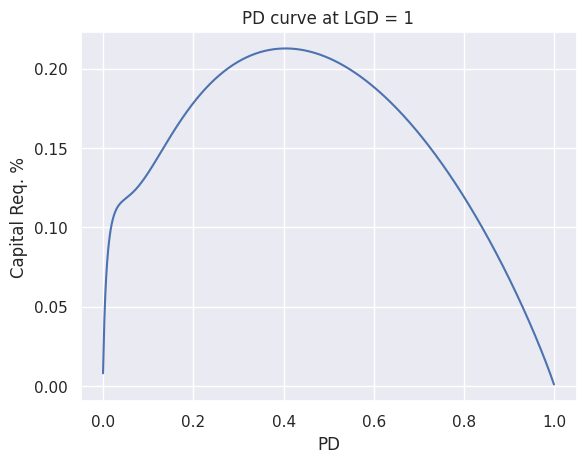

In [19]:
Xseries = np.arange(0, 1, 0.001)
LGD = 1
Yseries = [capital_requirement_retail(x, LGD) for x in Xseries]
plt.plot(Xseries, Yseries)
plt.title('PD curve at LGD = 1')
plt.xlabel('PD')
plt.ylabel('Capital Req. %')
plt.show()

Now, let's apply the result to the full dataset. For this, we need a [lambda function](https://www.w3schools.com/python/python_lambda.asp) that will map the vector inputs to the function inputs.

In [20]:
bankloan_data['CapitalReq'] = bankloan_data.apply(lambda x : capital_requirement_retail(x['PD'], x['LGD']), axis = 1)

In [21]:
bankloan_data['CapitalReq']

,CapitalReq
0,0.075353
1,0.005664
2,0.063482
3,0.061418
4,0.145197
...,...
1461,0.062622
1462,0.067778
1463,0.155465
1464,0.089833


And now we can plot the distribution using Seaborn. The distplot function does this and adds the KDE.

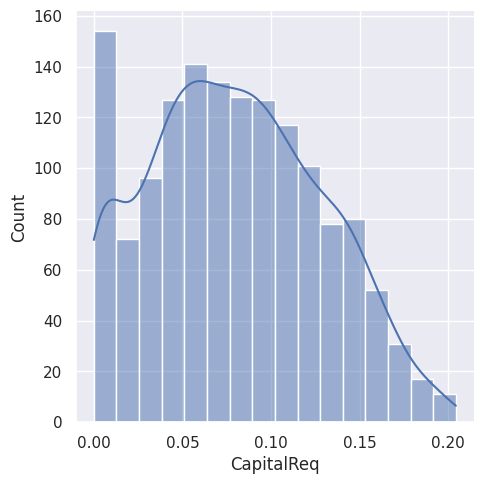

In [22]:
sns.displot(bankloan_data['CapitalReq'], kde=True)
plt.show()

And we can finally calculate the maximum Risk Weighted Asset (RWA) value that would be required to cover these instruments. Assuming a factor $F = 8\%$, remember that:

$$
RWA = \frac{1}{F} * K * EAD
$$

in retail lending the Exposure at Default is equal to the outstanding amount, leading to:

In [23]:
RWA = (1 / 0.08) * np.dot(bankloan_data['CapitalReq'], bankloan_data['Outstanding'])
RWA

np.float64(10593443.863630345)

Every bank will have a different factor of the RWA which it must conserve. This will depend on its own characteristics. If, for example, the bank had a 12% requirement, then its (total) regulatory capital would be equal to:

In [24]:
RWA = (1 / 0.12) * np.dot(bankloan_data['CapitalReq'], bankloan_data['Outstanding'])


# To format money correctly
import locale
locale.setlocale( locale.LC_ALL, '' )

# Display
out = locale.currency( RWA, grouping=True )
print('The maximum value for the RWA at a 12% capital requirement is equal to ' + out)

The maximum value for the RWA at a 12% capital requirement is equal to $7,062,295.91


However, Basel says that the RWA per business line is 12.5 times the capital requirement (i.e. it does not adjust by the bank's own load), so the 12.5 factor is the correct value to use when calculating the RWA of the line.